# [2]

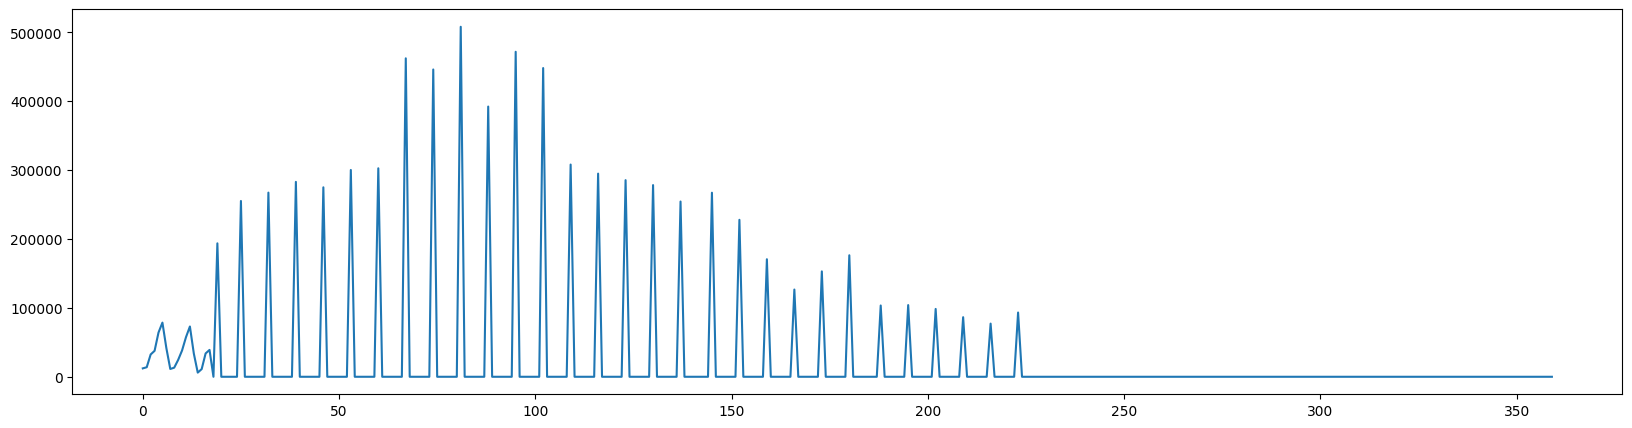

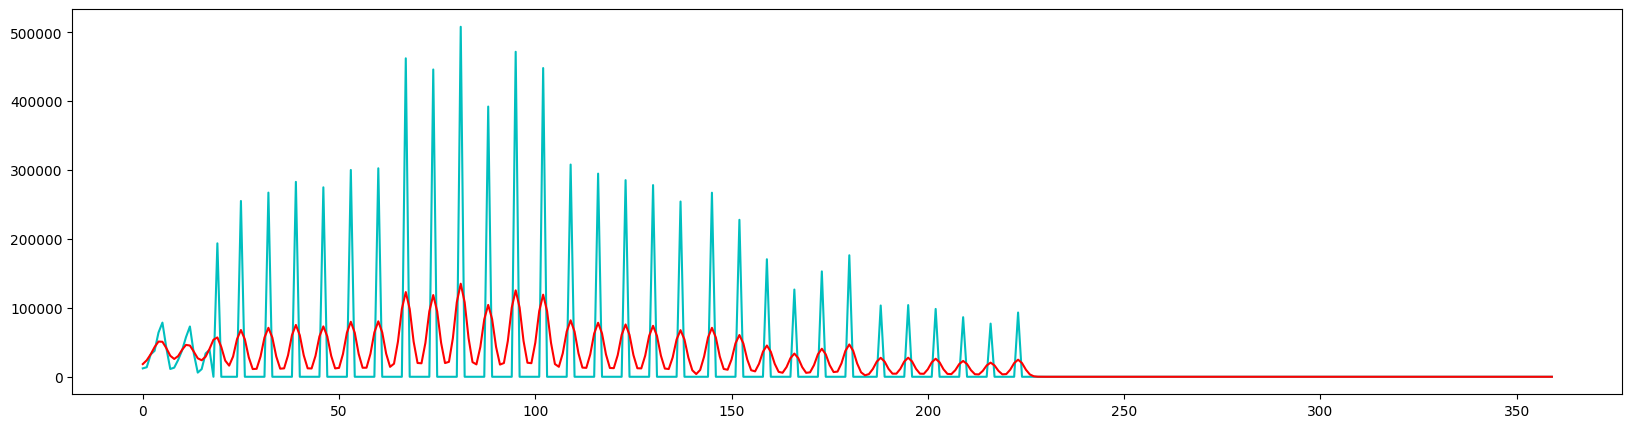

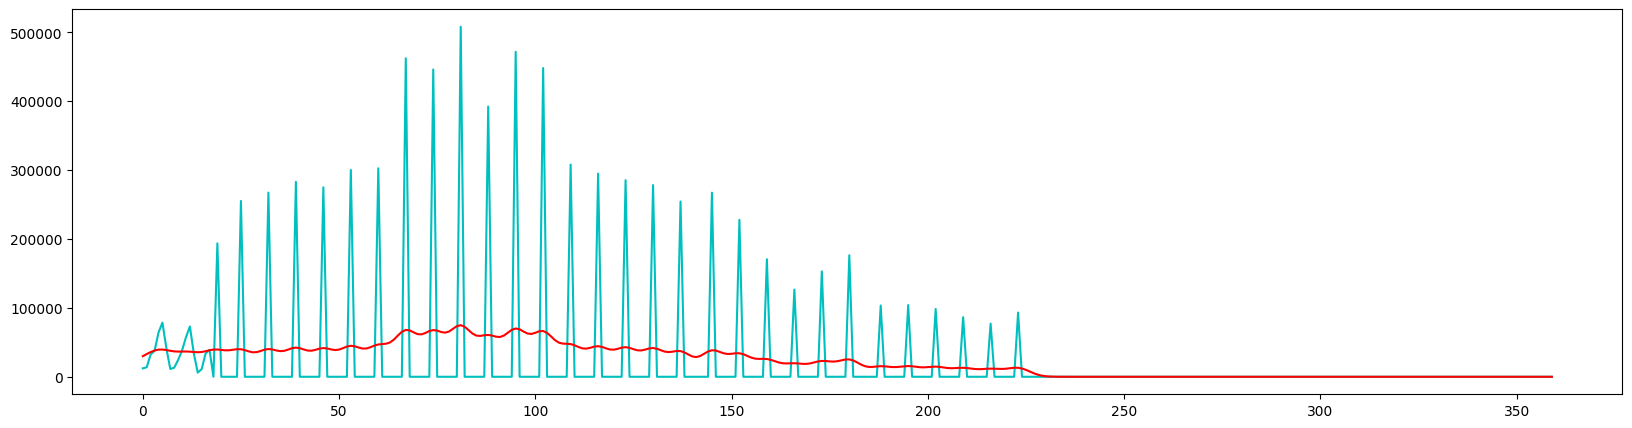

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.stattools import acf

df = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
df.head()

df=df[df['Country']=='United States of America']
df=df[['Date_reported','New_cases']]

df=df[df['Date_reported'] >= '2022-10-03']
df=df.reset_index()

plt.figure(figsize=(20,5))
plt.plot(df['New_cases'])

def KernelSmoothing(D, b):
    L=[]
    n=len(D)
    x=D
    for t in range(n):
        Lt,Lt2=[],[]
        for j in range(n):
            K_jt=norm.pdf((j-t)/b)
            Lt.append(K_jt)
        den=sum(Lt)
        for i in range(n):
            w_it=Lt[i]/den
            wx_it=w_it*x[i]
            Lt2.append(wx_it)
        m_t=sum(Lt2)
        L.append(m_t)
    plt.figure(figsize=(20,5))
    plt.plot(x,'c')
    plt.plot(L,'r')
    plt.show()

KernelSmoothing(df['New_cases'], 1.5)
KernelSmoothing(df['New_cases'], 3)

# [5]

In [2]:
def gen_MA_1(n, theta, ss): 
    Lx = []
    wt = np.random.normal(0, ss**0.5, n)
    for t in range(1, n):
        xt = wt[t] + theta*wt[t-1]
        Lx.append(xt)
    return Lx

In [3]:
def Auto_cov_corr(D):
    Lcov = []
    x = D
    n = len(D)
    mu = np.mean(x)
    for h in range(0, 6):
        Lh = []
        for t in range(0, n-h):
            ac = (x[t+h]-mu) * (x[t]-mu)
            Lh.append(ac)
        autocov_h = sum(Lh)/n
        Lcov.append(autocov_h)
    AutoCov = np.array(Lcov)
    Sacf = AutoCov/AutoCov[0]
    return Sacf

In [4]:
MA16_500, MA16_1000 = gen_MA_1(500, 0.25, 16), gen_MA_1(1000, 0.25, 16)
print(f'SACF_MA16_500: {Auto_cov_corr(MA16_500)}')
print(f"SACF_MA16_1000: {Auto_cov_corr(MA16_1000)}")

SACF_MA16_500: [ 1.          0.17879901 -0.04344873  0.02285118 -0.01384995 -0.05775855]
SACF_MA16_1000: [ 1.          0.20904976 -0.01490543  0.01105887  0.00665595 -0.0124989 ]


In [5]:
MA1_500, MA1_1000 = gen_MA_1(500, 4, 1), gen_MA_1(1000, 4, 1)
print(f'SACF_MA1_500: {Auto_cov_corr(MA1_500)}')
print(f"SACF_MA1_1000: {Auto_cov_corr(MA1_1000)}")

SACF_MA1_500: [ 1.          0.20481513  0.04075476  0.10793716 -0.07740997  0.01071808]
SACF_MA1_1000: [ 1.          0.21488081 -0.00100445  0.00528146  0.03171437  0.0147686 ]


# [6]

In [6]:
def AR_1(phi, n):
    Lx = []
    x0 = 0a
    for t in range(n):
        xt = phi*x0+np.random.normal(0, 1)
        Lx.append(xt)
        x0 = xt
    return Lx

In [7]:
ar_0 = AR_1(0.3, 400)
ar_1 = AR_1(0.8, 400)
ar_2 = AR_1(-0.9, 400)

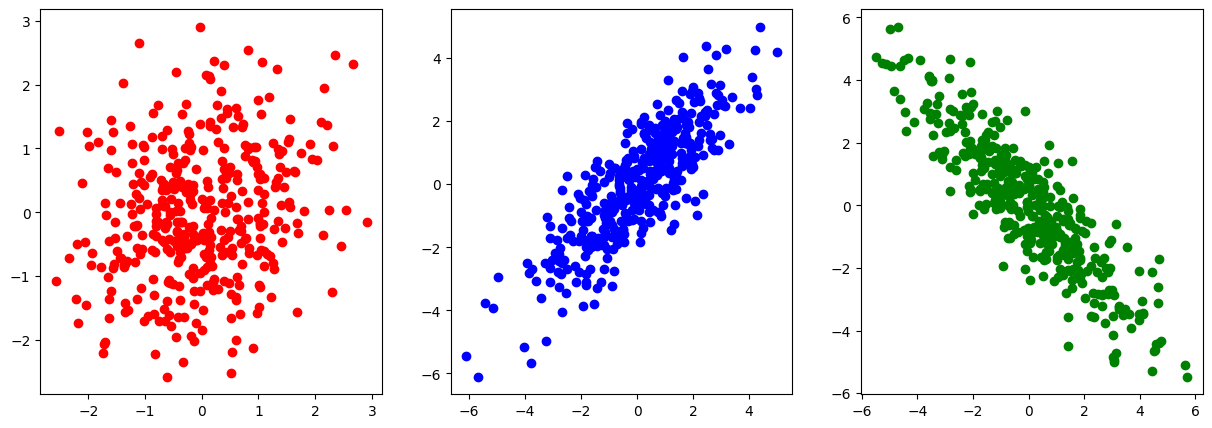

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(ar_0[:-1], ar_0[1:], color='red')

plt.subplot(1,3,2) 
plt.scatter(ar_1[:-1], ar_1[1:], color='blue')

plt.subplot(1,3,3)
plt.scatter(ar_2[:-1], ar_2[1:], color='green')

plt.show()

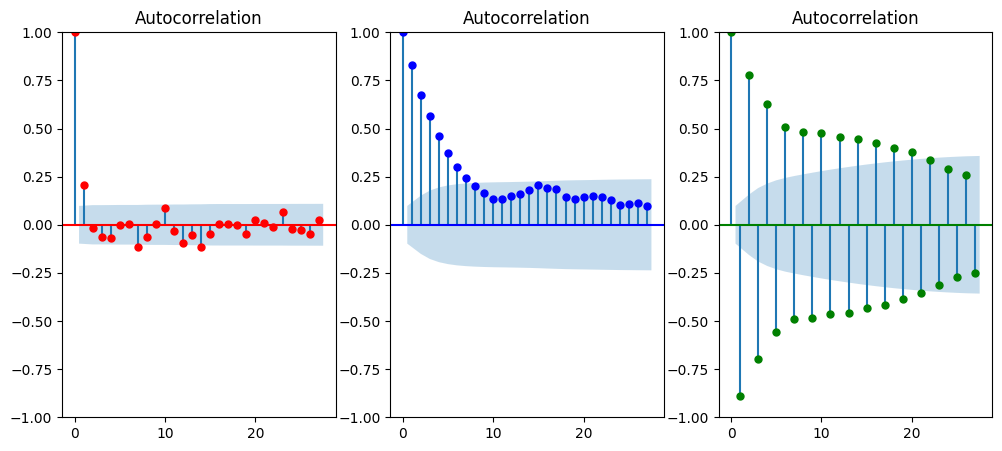

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sm.graphics.tsa.plot_acf(np.array(ar_0), color='red', ax=axes[0])
sm.graphics.tsa.plot_acf(np.array(ar_1), color='blue', ax=axes[1])
sm.graphics.tsa.plot_acf(np.array(ar_2), color='green', ax=axes[2])

plt.show()
